# CNN model

### Packages

In [81]:
# Packages:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from keras.utils import to_categorical

# Dataload

### Fire data

In [82]:
# Set the path to the folder containing PNG images
folder_path_fire = 'NAIP - 2-7 måneder før brand, 250 meter x 250 meter - NY 2'

In [83]:
# Define the fraction of the data to use for training, validation, and testing
train_fraction = 0.6
val_fraction = 0.2
test_fraction = 0.2

# Initialize lists to store the data
train_images_fire = []
train_labels_fire = []
val_images_fire = []
val_labels_fire = []
test_images_fire = []
test_labels_fire = []

# Loop through all the PNG files in the folder
for filename in os.listdir(folder_path_fire):
    if filename.endswith('.png'):
        # Set the path to the image file
        img_path = os.path.join(folder_path_fire, filename)

        # Open the image file
        img = Image.open(img_path)

        # Convert the image to RGB format
        img = img.convert('RGB')

        # Resize the image to a specific size
        img = img.resize((224, 224))

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Normalize the pixel values
        img_array = img_array / 255.0
        
        # Add the image array and its corresponding label (which is always 1) to the appropriate list
        if len(train_images_fire) < train_fraction * len(os.listdir(folder_path_fire)):
            train_images_fire.append(img_array)
            train_labels_fire.append(1)
        elif len(val_images_fire) < val_fraction * len(os.listdir(folder_path_fire)):
            val_images_fire.append(img_array)
            val_labels_fire.append(1)
        else:
            test_images_fire.append(img_array)
            test_labels_fire.append(1)

# Convert the lists to numpy arrays
X_train_fire = np.array(train_images_fire)
y_train_fire = np.array(train_labels_fire)
X_val_fire = np.array(val_images_fire)
y_val_fire = np.array(val_labels_fire)
X_test_fire = np.array(test_images_fire)
y_test_fire = np.array(test_labels_fire)

In [84]:
print('X_train: ', len(X_train_fire))
print('y_train: ', len(y_train_fire))
print('X_val: ', len(X_val_fire))
print('y_val: ', len(y_val_fire))
print('X_test: ', len(X_test_fire))
print('y_test: ', len(y_test_fire))

X_train:  1106
y_train:  1106
X_val:  369
y_val:  369
X_test:  367
y_test:  367


### No fire data:

In [85]:
# Set the path to the folder containing PNG images
folder_path_nofire = 'NAIP - 2-7 måneder før brand, 250 x 250 meter - Ikke brand'

In [86]:
# Define the fraction of the data to use for training, validation, and testing
train_fraction = 0.6
val_fraction = 0.2
test_fraction = 0.2

# Initialize lists to store the data
train_images_nofire = []
train_labels_nofire = []
val_images_nofire = []
val_labels_nofire = []
test_images_nofire = []
test_labels_nofire = []

# Loop through all the PNG files in the folder
for filename in os.listdir(folder_path_nofire):
    if filename.endswith('.png'):
        # Set the path to the image file
        img_path = os.path.join(folder_path_nofire, filename)

        # Open the image file
        img = Image.open(img_path)

        # Convert the image to RGB format
        img = img.convert('RGB')

        # Resize the image to a specific size
        img = img.resize((224, 224))

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Normalize the pixel values
        img_array = img_array / 255.0
        
        # Add the image array and its corresponding label (which is always 1) to the appropriate list
        if len(train_images_nofire) < train_fraction * len(os.listdir(folder_path_nofire)):
            train_images_nofire.append(img_array)
            train_labels_nofire.append(0)
        elif len(val_images_nofire) < val_fraction * len(os.listdir(folder_path_nofire)):
            val_images_nofire.append(img_array)
            val_labels_nofire.append(0)
        else:
            test_images_nofire.append(img_array)
            test_labels_nofire.append(0)

# Convert the lists to numpy arrays
X_train_nofire = np.array(train_images_nofire)
y_train_nofire = np.array(train_labels_nofire)
X_val_nofire = np.array(val_images_nofire)
y_val_nofire = np.array(val_labels_nofire)
X_test_nofire = np.array(test_images_nofire)
y_test_nofire = np.array(test_labels_nofire)

In [87]:
print('X_train: ', len(X_train_nofire))
print('y_train: ', len(y_train_nofire))
print('X_val: ', len(X_val_nofire))
print('y_val: ', len(y_val_nofire))
print('X_test: ', len(X_test_nofire))
print('y_test: ', len(y_test_nofire))

X_train:  1108
y_train:  1108
X_val:  370
y_val:  370
X_test:  368
y_test:  368


## Combine the two datasets into one:

In [88]:
X_train = np.concatenate((X_train_fire, X_train_nofire))
y_train = np.concatenate((y_train_fire, y_train_nofire))

X_val = np.concatenate((X_val_fire, X_val_nofire))
y_val = np.concatenate((y_val_fire, y_val_nofire))

X_test = np.concatenate((X_test_fire, X_test_nofire))
y_test = np.concatenate((y_test_fire, y_test_nofire))

In [89]:
print('X_train: ', len(X_train))
print('y_train: ', len(y_train))
print('X_val: ', len(X_val))
print('y_val: ', len(y_val))
print('X_test: ', len(X_test))
print('y_test: ', len(y_test))

X_train:  2214
y_train:  2214
X_val:  739
y_val:  739
X_test:  735
y_test:  735


# Baseline CNN model (percentage output)

In [90]:
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [79]:
model = tf.keras.Sequential([
    # Convolutional layer 1 with 32 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer 1 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 2 with 64 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Max pooling layer 2 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 3 with 128 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Max pooling layer 3 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Flatten layer to transform 3D tensor to a 1D tensor
    tf.keras.layers.Flatten(),
    # Dense layer 1 with 512 neurons, activation function ReLU
    tf.keras.layers.Dense(512, activation='relu'),
    # Dense layer 2 with 2 neurons (output layer), activation function softmax (multi-class classification)
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 128)     

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10


2023-04-19 15:46:54.552563: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


70/70 [==============================] - 14s 187ms/step - loss: 0.8500 - accuracy: 0.6134 - val_loss: 0.5791 - val_accuracy: 0.6725
Epoch 2/10
70/70 [==============================] - 10s 136ms/step - loss: 0.4999 - accuracy: 0.7647 - val_loss: 0.4977 - val_accuracy: 0.7767
Epoch 3/10
70/70 [==============================] - 9s 134ms/step - loss: 0.4712 - accuracy: 0.7832 - val_loss: 0.4057 - val_accuracy: 0.8254
Epoch 4/10
70/70 [==============================] - 9s 136ms/step - loss: 0.4426 - accuracy: 0.7981 - val_loss: 0.5995 - val_accuracy: 0.7131
Epoch 5/10
70/70 [==============================] - 9s 132ms/step - loss: 0.4015 - accuracy: 0.8202 - val_loss: 0.4305 - val_accuracy: 0.8214
Epoch 6/10
70/70 [==============================] - 9s 132ms/step - loss: 0.3762 - accuracy: 0.8388 - val_loss: 0.4104 - val_accuracy: 0.8336
Epoch 7/10
70/70 [==============================] - 9s 132ms/step - loss: 0.3585 - accuracy: 0.8369 - val_loss: 0.3678 - val_accuracy: 0.8620
Epoch 8/10
70/7

In [52]:
# save the model
model.save('CNN_precentage.h5')

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

23/23 [==============================] - 2s 50ms/step - loss: 0.4769 - accuracy: 0.8218
Test accuracy: 0.8217687010765076


In [16]:
import numpy as np

# predict on test set
y_pred = model.predict(X_test)

# apply softmax to get probabilities
y_pred_prob = np.apply_along_axis(lambda x: np.exp(x) / np.sum(np.exp(x)), 1, y_pred)

# print probabilities
print(y_pred_prob)

23/23 [==============================] - 1s 45ms/step
[[0.2721328  0.7278672 ]
 [0.26896375 0.73103625]
 [0.26971415 0.7302859 ]
 ...
 [0.72547925 0.27452078]
 [0.6905048  0.30949515]
 [0.72475183 0.27524814]]


In [17]:
y_test # 0 = no fire, 1 = fire 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
y_test.shape

(735, 2)

In [19]:
y_pred_prob.shape

(735, 2)

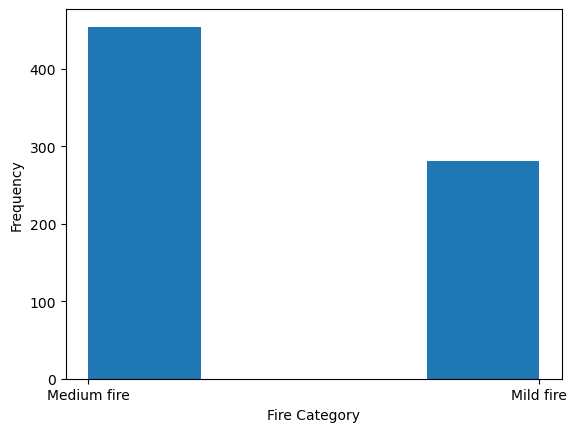

In [23]:
# Assuming y_pred_prob is a numpy array of predicted probabilities
categories = []
for prob in y_pred_prob:
    if prob[1] < 0.25:
        categories.append('No fire')
    elif prob[1] < 0.50:
        categories.append('Mild fire')
    elif prob[1] < 0.75:
        categories.append('Medium fire')
    else:
        categories.append('Big fire')

# Plot a bar chart of the categories
plt.hist(categories, bins=4)
plt.xlabel('Fire Category')
plt.ylabel('Frequency')
plt.show()

In [24]:
categories

['Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Mild fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Medium fire',
 'Me

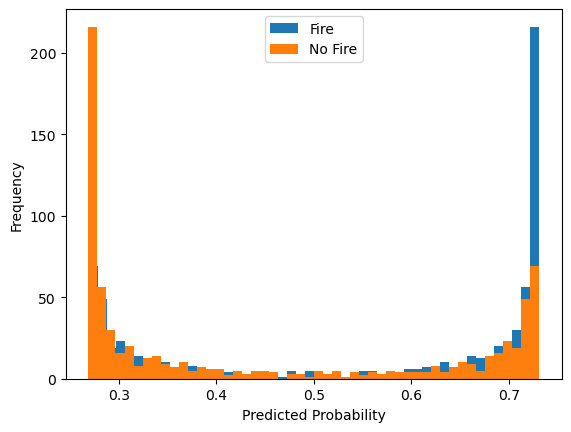

In [22]:
import matplotlib.pyplot as plt

# assuming y_pred_prob is a numpy array of predicted probabilities
plt.hist(y_pred_prob[:, 1], bins=50, label='Fire')
plt.hist(y_pred_prob[:, 0], bins=50, label='No Fire')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

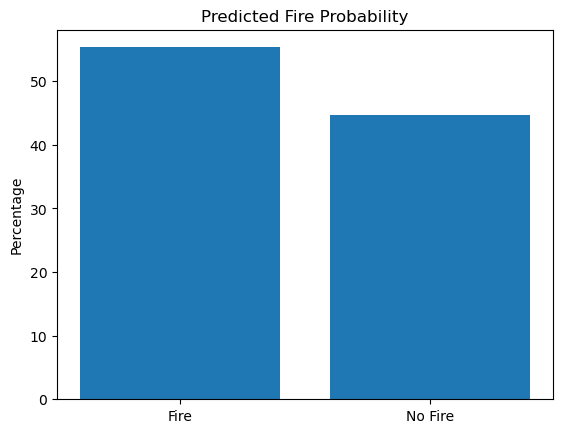

In [21]:
import matplotlib.pyplot as plt

# Get percentages of fire and no fire from y_pred_prob
fire_percent = y_pred_prob.mean(axis=0)[1] * 100
no_fire_percent = y_pred_prob.mean(axis=0)[0] * 100

# Create a bar chart
plt.bar(['Fire', 'No Fire'], [fire_percent, no_fire_percent])
plt.ylabel('Percentage')
plt.title('Predicted Fire Probability')
plt.show()

# Hyperparameter tunning 

In [91]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
                            activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
                            activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer to transform 3D tensor to a 1D tensor
    model.add(layers.Flatten())

    # Add dense layers
    model.add(layers.Dense(units=hp.Int('dense_1_units', min_value=64, max_value=512, step=64),
                           activation='relu'))

    # Output layer with 2 neurons (for binary classification) and softmax activation
    model.add(layers.Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [92]:
# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld'
)


INFO:tensorflow:Reloading Tuner from my_dir/helloworld/tuner0.json


INFO:tensorflow:Reloading Tuner from my_dir/helloworld/tuner0.json


In [93]:
# Start the search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 07m 26s]
val_accuracy: 0.6362811923027039

Best val_accuracy So Far: 0.6362811923027039
Total elapsed time: 00h 23m 20s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [95]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hp

In [96]:
model = build_model(best_hp)
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
70/70 [==============================] - 19s 268ms/step - loss: 0.7287 - accuracy: 0.5266 - val_loss: 0.6939 - val_accuracy: 0.5007
Epoch 2/10
70/70 [==============================] - 15s 211ms/step - loss: 0.6935 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 3/10
70/70 [==============================] - 15s 209ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 4/10
70/70 [==============================] - 15s 209ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 5/10
70/70 [==============================] - 15s 209ms/step - loss: 0.6933 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 6/10
70/70 [==============================] - 15s 210ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 7/10
70/70 [==============================] - 15s 213ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5007

In [97]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

23/23 [==============================] - 2s 47ms/step - loss: 0.6932 - accuracy: 0.5007
Test accuracy: 0.5006802678108215


# Grad-cam

In [124]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
#from tensorflow.keras.applications import VGG16
import tensorflow as tf
import numpy as np
import cv2

In [125]:
base_model = tf.keras.models.load_model('CNN_precentage.h5')

In [136]:
class GradCAM:
    def __init__(self, model, class_idx, layer_name=None):
        self.model = model
        self.class_idx = class_idx
        self.layer_name = layer_name
        if self.layer_name is None:
            self.layer_name = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layer_name).output, self.model.output]
        )
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.class_idx]
        grads = tape.gradient(loss, convOutputs)
        guidedGrads = tf.cast(convOutputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_JET):
        heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)

In [137]:
# defining the image and the class index 
img_path = 'NAIP - 2-7 måneder før brand, 250 meter x 250 meter - NY 2/03-711178-04.png'
class_index = 1

In [138]:
# load image and preprocess
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)

In [141]:
# Use the GradCAM class to compute the heatmap and overlay it on the original image:
cam = GradCAM(model=base_model, class_idx=class_index)
heatmap = cam.compute_heatmap(img)
#heatmap, output = cam.overlay_heatmap(heatmap, img)

In [142]:
heatmap

array([[24, 24, 24, ..., 39, 39, 39],
       [24, 24, 24, ..., 39, 39, 39],
       [24, 24, 24, ..., 39, 39, 39],
       ...,
       [97, 97, 97, ..., 51, 51, 51],
       [97, 97, 97, ..., 51, 51, 51],
       [97, 97, 97, ..., 51, 51, 51]], dtype=uint8)

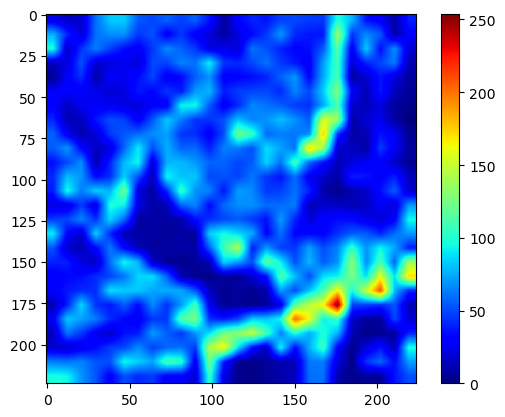

In [143]:
import matplotlib.pyplot as plt

# Plot the heatmap as an image
plt.imshow(heatmap, cmap='jet')

# Add a colorbar to the plot
plt.colorbar()

# Show the plot
plt.show()

In [145]:
img_path = 'NAIP - 2-7 måneder før brand, 250 meter x 250 meter - NY 2/03-711178-04.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img.astype("float32") / 255.0

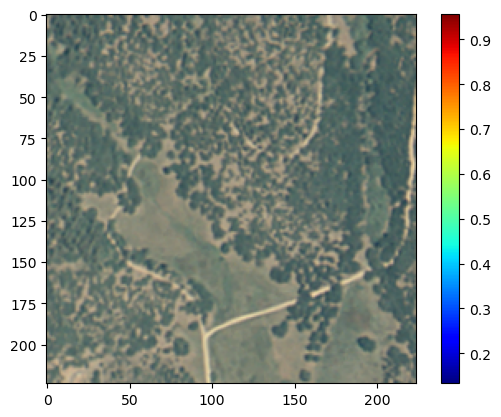

In [146]:
import matplotlib.pyplot as plt

# Plot the heatmap as an image
plt.imshow(img, cmap='jet')

# Add a colorbar to the plot
plt.colorbar()

# Show the plot
plt.show()

In [147]:
# Husk at få Overlappen til at virker 

# Baseline

In [ ]:
model = tf.keras.Sequential([
    # Convolutional layer 1 with 32 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer 1 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 2 with 64 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Max pooling layer 2 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Convolutional layer 3 with 128 filters, each filter is a 3x3 kernel, activation function ReLU
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Max pooling layer 3 with a 2x2 pool size
    tf.keras.layers.MaxPooling2D((2,2)),
    # Flatten layer to transform 3D tensor to a 1D tensor
    tf.keras.layers.Flatten(),
    # Dense layer 1 with 512 neurons, activation function ReLU
    tf.keras.layers.Dense(512, activation='relu'),
    # Dense layer 2 with 1 neuron (output layer), activation function sigmoid (binary classification)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# CNN with pretrained model: Resnet 50

In [ ]:
# Create an instance of the ResNet50 model and specify the input shape to match the images
resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Include_top=False means that we don't include the top fully connected layers of the
#ResNet50 model (which are meant for ImageNet classification)

# Freeze the layers of the ResNet50 model to prevent their weights from being updated during training (common technique)
for layer in resnet_model.layers:
    layer.trainable = False


# Add own layers on top of the ResNet50 model (maybe necessary )
model = tf.keras.Sequential([
    resnet_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and an optimizer of your choice
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train and evaluate the model using on data:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# CNN with pretrained model: InceptionV3

In [ ]:
# Create an instance of the InceptionV3 model and specify the input shape to match the images
inception_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the layers of the InceptionV3 model to prevent their weights from being updated during training
for layer in inception_model.layers:
    layer.trainable = False

# Add own layers on top of the InceptionV3 model
model = tf.keras.Sequential([
    inception_model,
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with binary crossentropy loss and an optimizer of your choice
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Train and evaluate the model using on data:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Why is the CNN better than CNN with ResNet 50?

If your dataset is small and similar to the original dataset used to train the pre-trained model, using a simple CNN may be sufficient and even outperform the pre-trained model. In this case, the pre-trained model may overfit on your small dataset and not generalize well to new images.